**HEART DISEASE PREDICTION** <br>
Accuracy = 85.32%

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [205]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [206]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [208]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [209]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [210]:
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical = ['Sex','ChestPainType','FastingBS','RestingECG','ST_Slope','ExerciseAngina','HeartDisease']

In [211]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [212]:
Y = df['HeartDisease'].values

In [213]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [214]:
#Sex
df['Sex'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


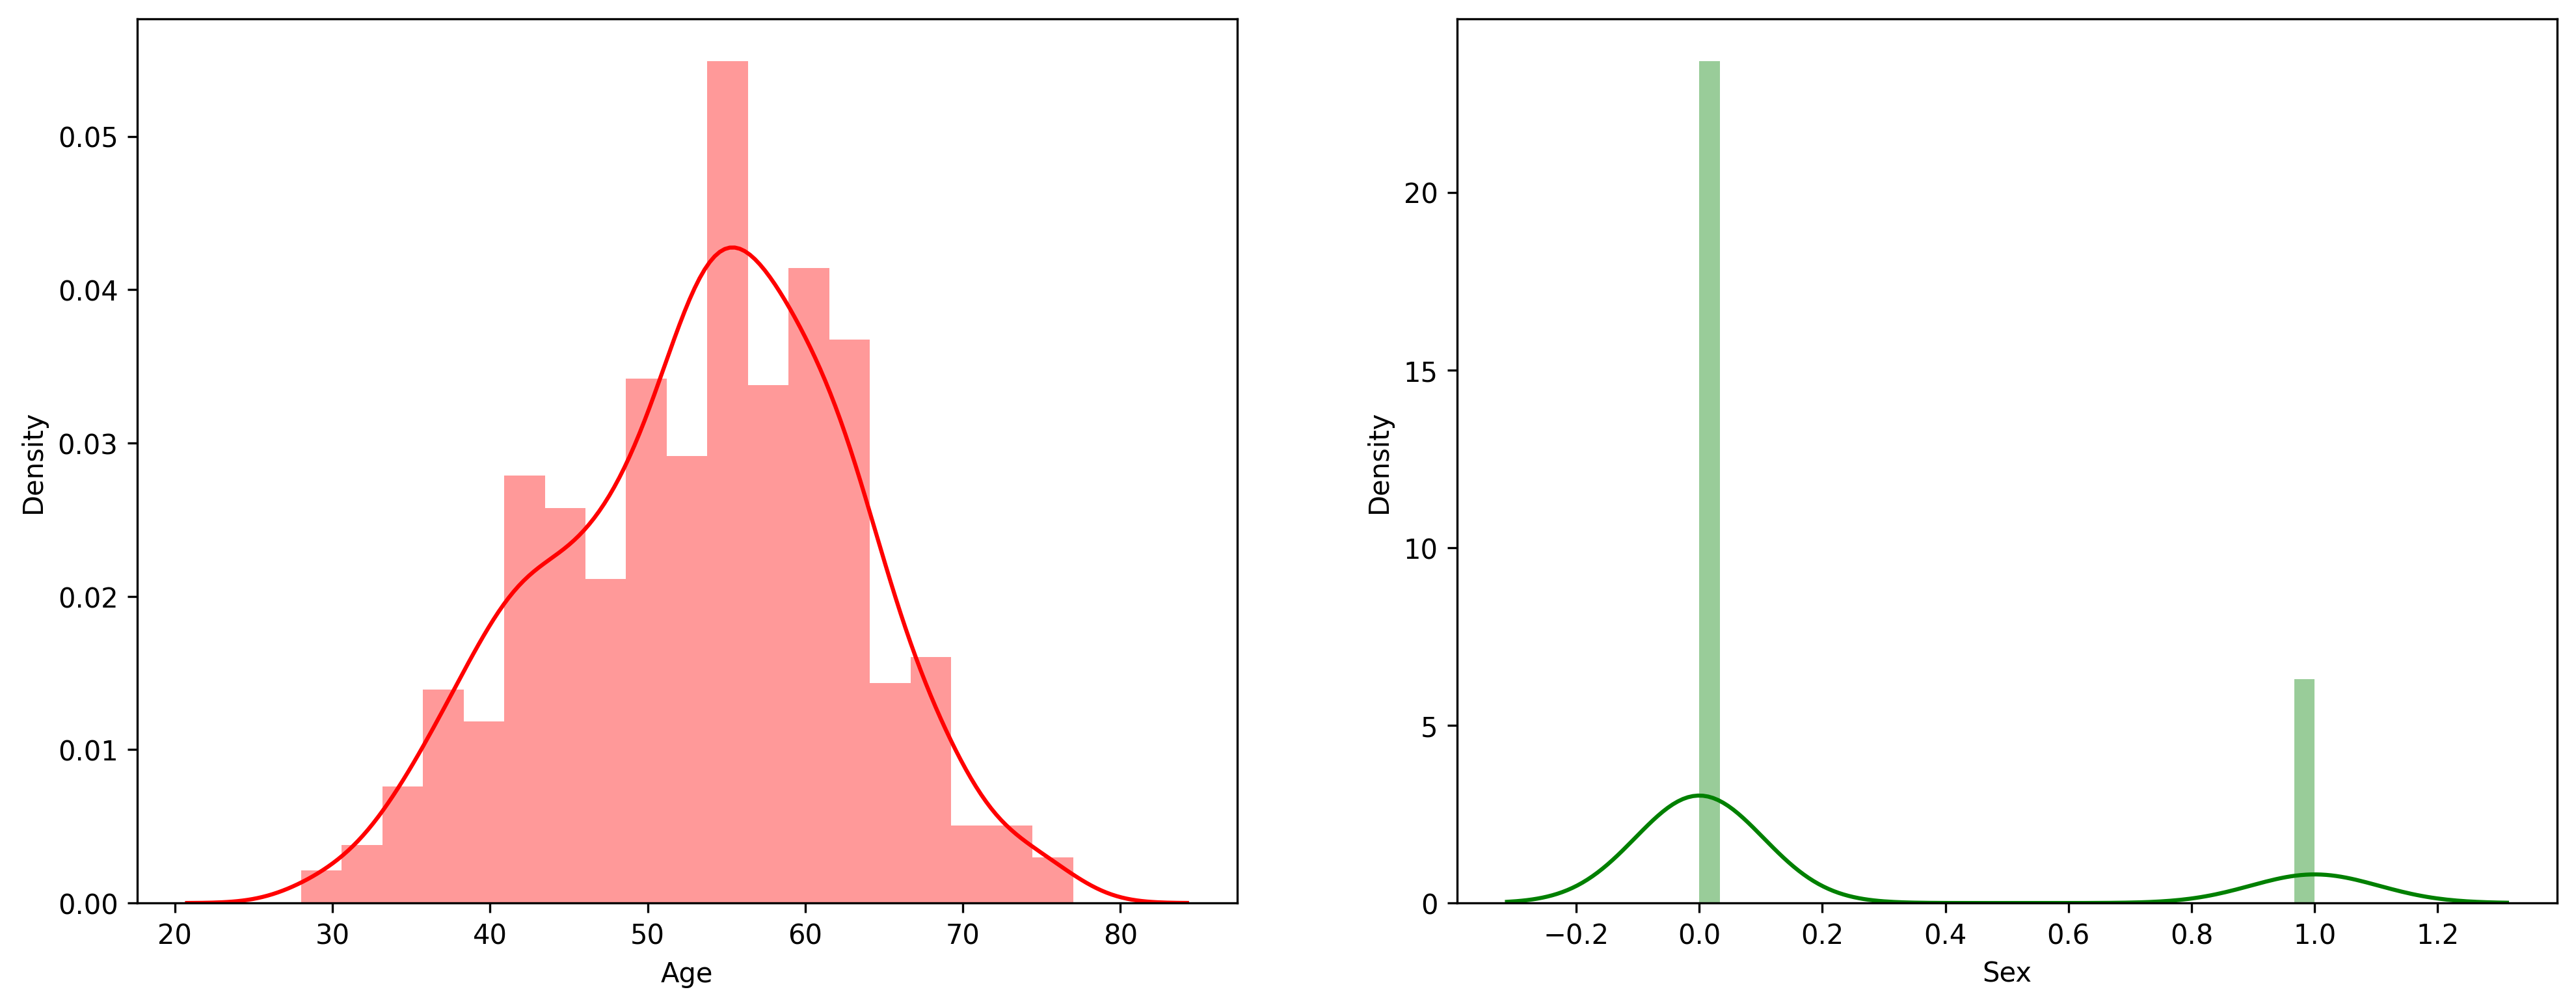

In [215]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=300)
sns.distplot(df["Age"], ax=ax1, color="red")
sns.distplot(df["Sex"], ax=ax2, color="green")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c2627d90>,
      dtype=object)

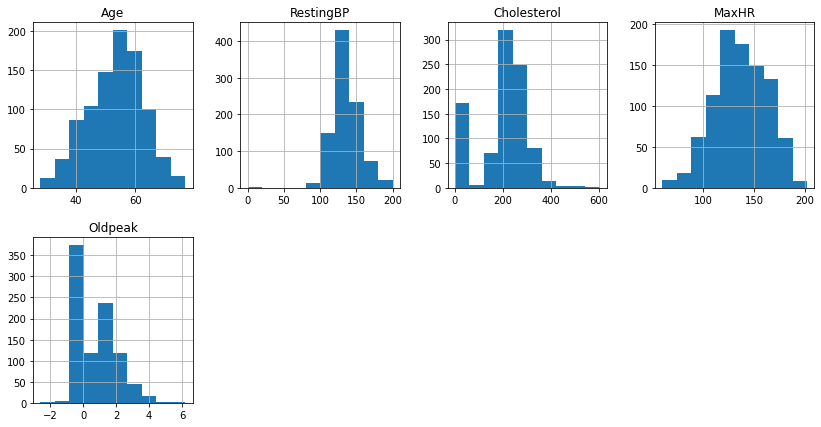

In [216]:
df[numerical].hist(figsize=(14,7),layout=(2,4))

<center>  <b>Changing Categorical into numeric data

In [217]:
# ChestPainType 
ChestPainType_dummies = pd.get_dummies(df["ChestPainType"])
df = pd.concat([df,ChestPainType_dummies],axis=1)
df.drop('ChestPainType',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0


In [218]:
#RestingECG
RestingECG_dummies = pd.get_dummies(df["RestingECG"])
df = pd.concat([df,RestingECG_dummies],axis=1)
df.drop('RestingECG',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,0,140,289,0,172,N,0.0,Up,0,0,1,0,0,0,1,0
1,49,1,160,180,0,156,N,1.0,Flat,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,N,0.0,Up,0,0,1,0,0,0,0,1
3,48,1,138,214,0,108,Y,1.5,Flat,1,1,0,0,0,0,1,0
4,54,0,150,195,0,122,N,0.0,Up,0,0,0,1,0,0,1,0


In [219]:
#ExerciseAngina
ExerciseAngina_dummies = pd.get_dummies(df["ExerciseAngina"])
df = pd.concat([df,ExerciseAngina_dummies],axis=1)
df.drop('ExerciseAngina',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,0,140,289,0,172,0.0,Up,0,0,1,0,0,0,1,0,1,0
1,49,1,160,180,0,156,1.0,Flat,1,0,0,1,0,0,1,0,1,0
2,37,0,130,283,0,98,0.0,Up,0,0,1,0,0,0,0,1,1,0
3,48,1,138,214,0,108,1.5,Flat,1,1,0,0,0,0,1,0,0,1
4,54,0,150,195,0,122,0.0,Up,0,0,0,1,0,0,1,0,1,0


In [220]:
#ST_Slope
ST_Slope_dummies = pd.get_dummies(df["ST_Slope"])
df = pd.concat([df,ST_Slope_dummies],axis=1)
df.drop('ST_Slope',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [221]:
X=df
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,1.2,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,0,130,131,0,115,1.2,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,1,130,236,0,174,0.0,1,0,1,0,0,1,0,0,1,0,0,1,0


MODEL BUILDING

In [222]:
X.drop(['HeartDisease'], axis=1, inplace=True)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [223]:
# transforming the data
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

In [224]:
X

array([[-1.4331398 , -0.51595242,  0.41090889, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.93816322,  1.49175234, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854, -0.51595242, -0.12951283, ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.51595242, -0.12951283, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972,  1.93816322, -0.12951283, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563, -0.51595242,  0.30282455, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [225]:
Y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [226]:
#MODEL
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

LOGISTIC REGRESSION MODEL

In [227]:
from sklearn.linear_model import LogisticRegression
TrainingModel = LogisticRegression()
TrainingModel.fit(X_train, Y_train)

LogisticRegression()

In [228]:
print("Accuracy of the model: ")
print(TrainingModel.score(X_test, Y_test)*100,"%")

Accuracy of the model: 
84.23913043478261 %


In [229]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no heart disease', 'heart disease']); ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'])

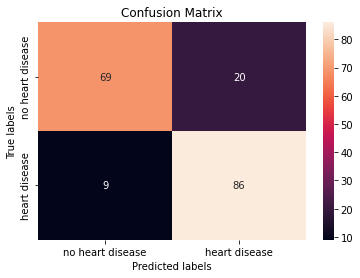

In [230]:
out=TrainingModel.predict(X_test)
plot_confusion_matrix(Y_test,out)

DECISION TREE MODEL

In [231]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier()
DTmodel.fit(X_train, Y_train)

DecisionTreeClassifier()

In [232]:
DTmodel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [233]:
print("Accuracy of model:", end=" ") 
print(DTmodel.score(X_test, Y_test)*100,"%")

Accuracy of model: 73.91304347826086 %


SVM MODEL

In [234]:
from sklearn.svm import SVC
SVMmodel = SVC(kernel="rbf", gamma= 0.001)

In [235]:
SVMmodel.fit(X_train, Y_train)

SVC(gamma=0.001)

In [236]:
print("Accuracy of model:", end=" ") 
print(SVMmodel.score(X_test, Y_test)*100,"%")

Accuracy of model: 85.32608695652173 %


In [237]:
models = {'DecisionTree': DTmodel.score,
         'SVM': SVMmodel.score,
         'LogisticRegression': TrainingModel.score}

best_model = max(models)
print('The best model is',best_model)

The best model is SVM
